In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

2024-04-24 16:19:43.522809: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 16:19:44.313036: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
# loading the dataset
iris_dataset = sklearn.datasets.load_iris()
X = iris_dataset.data
Y = iris_dataset.target.reshape(-1, 1)
print(Y.shape)

(150, 1)


In [12]:
# encoding the target variables
encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y)
print(Y.shape)

(150, 3)


In [13]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [20]:
# implementing the model
class ELM(object):
    def __init__(self, input_layer = 'relu', hidden_layer = ['relu'], output_layer = 'relu'):
        self.input_layer = input_layer
        self.hidden_layer = hidden_layer
        self.output_layer = output_layer
        self.model = None

    def buildNetwork(self):
        pass

    def setWeights(self):
        weights = self.model.layers[-1].get_weights()
        weights[0] = np.random.random_sample((weights[0].shape[0],weights[0].shape[1]))
        self.model.layers[-1].set_weights(weights)

    def fit(self, X_train, y_train):
        return self.model.fit(X_train, y_train, verbose=2, batch_size= np.size(y_train), epochs=1)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def getWeights(self):
        return self.model.get_weights()

    def summary(self):
        self.model.summary()

class MultiClassify(ELM):

    def buildNetwork(self, input_dim):
            self.model = Sequential()

            # Input layer
            self.model.add(Dense(units=150, activation=self.input_layer, input_dim=input_dim, trainable=False))
            self.setWeights()
            # Hidden layer
            for act in self.hidden_layer:
                    self.model.add(Dense(units=50, activation=act, trainable=False))
            # Output layer
            self.model.add(Dense(units=3, activation=self.output_layer, trainable=True))

            self.model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

class BinaryClassify(ELM):

    def buildNetwork(self, input_dim):
            self.model = Sequential()

            # Input layer
            self.model.add(Dense(units=150, activation=self.input_layer, input_dim=input_dim, trainable=False))
            self.setWeights()
            # Hidden layer
            for act in self.hidden_layer:
                    self.model.add(Dense(units=20, activation=act, trainable=False))
            # Output layer
            self.model.add(Dense(units=2, activation=self.output_layer, trainable=True))

            self.model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [21]:
# creating a classifier using elm's
elm = MultiClassify(hidden_layer=['relu'], output_layer='softmax')

input_d = X.shape[1] # number of features
#print(input_dim)
elm.buildNetwork(input_dim = 4)

/home/grey/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 0s - 20ms/step - accuracy: 0.3661 - loss: 5.5606


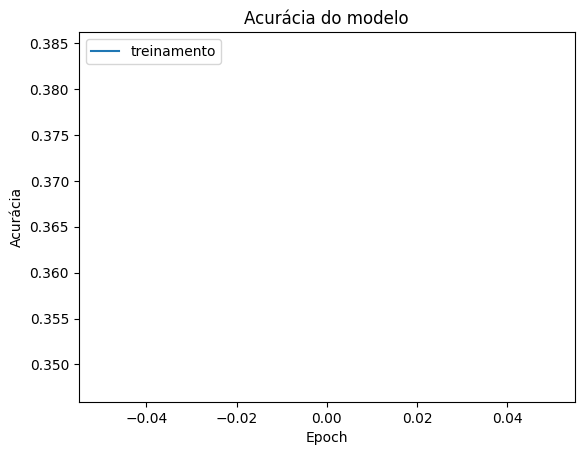

In [24]:
# training the classifier:
history = elm.fit(x_train, y_train)

plt.plot(history.history['accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['treinamento'], loc='upper left')
plt.show()

In [23]:
print ('Validação: ', elm.evaluate(x_test, y_test)[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2412 - loss: 7.5925  
Validação:  0.2368421107530594
